<a href="https://colab.research.google.com/github/Gkimatov/CS-460/blob/main/460_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime as dt
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
#this command will download the original file
!gdown --id 1es5kvNIhxMnw0nSFrWAZskxiVECzkvkG

Downloading...
From: https://drive.google.com/uc?id=1es5kvNIhxMnw0nSFrWAZskxiVECzkvkG
To: /content/NYC_data_clean.csv
100% 278M/278M [00:02<00:00, 120MB/s]


In [ ]:
 #this command will download the unemployment data file in NYC
 !gdown --id 19enx0upJXRlvQYCPzg5zqgG-AfKrgfQY

Downloading...
From: https://drive.google.com/uc?id=19enx0upJXRlvQYCPzg5zqgG-AfKrgfQY
To: /content/NYC_Unemployment.csv
100% 3.27k/3.27k [00:00<00:00, 5.22MB/s]


In [ ]:
#Importing the data

df_un_clean=pd.read_csv('NYC_Unemployment.csv')
df_clean=pd.read_csv('NYC_data_clean.csv')

In [ ]:
#Mapping the data values from object type to integer
df_un_clean['Month'] = df_un_clean['Month'].map({ 'January': 1,
                                                   'February': 2,
                                                   'March': 3,
                                                   'April': 4,
                                                    'May':5,
                                                     'June':6,
                                                     'July':7,
                                                     'August':8,
                                                     'September':9,
                                                     'October':10,
                                                     'November':11,
                                                     'December':12})
#Dropping the first 12 rows because those are values from 2005
#But we don't have arrest data from 2005 in our main dataset

df_un_clean=df_un_clean.drop(range(0,12))

#Converting the datatype from object to datetime
df_clean['arrest_date'] = pd.to_datetime(df_clean['arrest_date'])

#Extracting the year and month
df_clean['arrest_date'] = df_clean['arrest_date'].dt.strftime('%Y-%m')

#Counting the arrests based on individual month and year
daily_arrests_month = df_clean['arrest_date'].value_counts().rename_axis('arrest_month').reset_index(name='arrest_count')

#Sorting the values from 2006-01 to 2019-12
daily_arrests_month=daily_arrests_month.sort_values(by='arrest_month',ascending=True)

#Setting up the target values for the model
Y=pd.DataFrame(daily_arrests_month['arrest_count'])
Y.reset_index(drop=True,inplace=True)

#Dropping the arrest_count column from daily_arrests_month dataframe because we dont need that
#in the features
daily_arrests_month.drop(['arrest_count'],inplace=True,axis=1)

#Adding an extra column in the daily_arrests_month dataframe
daily_arrests_month['Rate']=df_un_clean['Rate']

#Selecting the features
#Our features are Arrest year month and Unemployment Rate
X=pd.DataFrame(daily_arrests_month)
X.reset_index(drop=True,inplace=True)

#Taking only year
X['arrest_month']=daily_arrests_month['arrest_month']
X['arrest_month']=pd.to_datetime(X['arrest_month'])
X['arrest_month']=X['arrest_month'].dt.year

#Filling up the null values with the last value
X['Rate']=X['Rate'].fillna(method ='bfill')

# Below the LinearRegression model will calculate the future crime rate based on year and unemployment rate.

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Creating a linear Regression Model
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20)
model.fit(X_train, Y_train)
prediction= model.predict(X_test)
Acc=model.score(X_test, Y_test)
print ("Accuracy={0:.2f}".format(Acc))

Accuracy=0.60


In [ ]:
print('In the year of 2045, if the average unemployment rate of NYC is 88% then there will be',math.ceil(abs(model.predict([[2045,0.88]]))),'crime')

print('In the year of 2045, if the average unemployment rate of NYC is 1% then there will be',math.ceil(abs(model.predict([[2045,0.01]]))),'crime')


In the year of 2045, if the average unemployment rate of NYC is 88% then there will be 19553 crime
In the year of 2045, if the average unemployment rate of NYC is 1% then there will be 4750 crime


## So based on our model prediction, the crime rate will rise, if the unemployment rate rises.

Text(0, 0.5, 'prediction')

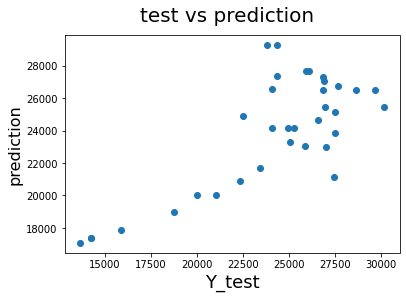

In [ ]:
fig = plt.figure()
plt.scatter(Y_test,prediction)
fig.suptitle('test vs prediction', fontsize=20)            
plt.xlabel('Y_test', fontsize=18)                          
plt.ylabel('prediction', fontsize=16)   